In [342]:
import pandas as pd

In [343]:
import os
import pandas as pd  # Make sure pandas is imported

# Correct path to your Excel file
path = r"C:\Users\HP\Downloads\pcos detection\PCOS_data_without_infertility.xlsx"

# Check if the file exists at the specified path
print(f"Checking if the file exists at {path}...")
if os.path.exists(path):
    print("File found, attempting to load...")
    try:
        data = pd.read_excel(path)
        print("File loaded successfully.")
        print("First 5 rows of data:")
        print(data.head())
    except Exception as e:
        print(f"Error while loading the file: {e}")
else:
    print(f"Error: The file was not found at {path}")


Checking if the file exists at C:\Users\HP\Downloads\pcos detection\PCOS_data_without_infertility.xlsx...
File found, attempting to load...
File loaded successfully.
First 5 rows of data:
   Sl. No  Patient File No.  PCOS   Age (yrs)  Weight (Kg)  Height(Cm)    BMI  \
0       1                 1     0          28         44.6        152.0  19.3   
1       2                 2     0          36         65.0        161.5   NaN   
2       3                 3     1          33         68.8        165.0   NaN   
3       4                 4     0          37         65.0        148.0   NaN   
4       5                 5     0          25         52.0        161.0   NaN   

   Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  Fast food (Y/N)  \
0           15                78                22  ...              1.0   
1           15                74                20  ...              0.0   
2           11                72                18  ...              1.0   
3           13       

In [344]:
print(data)

     Sl. No  Patient File No.  PCOS   Age (yrs)  Weight (Kg)  Height(Cm)   \
0         1                 1     0          28         44.6      152.000   
1         2                 2     0          36         65.0      161.500   
2         3                 3     1          33         68.8      165.000   
3         4                 4     0          37         65.0      148.000   
4         5                 5     0          25         52.0      161.000   
..      ...               ...   ...         ...          ...          ...   
536     537               537     0          35         50.0      164.592   
537     538               538     0          30         63.2      158.000   
538     539               539     0          36         54.0      152.000   
539     540               540     0          27         50.0      150.000   
540     541               541     1          23         82.0      165.000   

      BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
0    19.

In [345]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [346]:
import warnings
warnings.filterwarnings('ignore')


In [347]:
from collections import Counter
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [348]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


In [406]:
# Strip spaces from column names
data.columns = data.columns.str.strip()

# Show column names to confirm 'PCOS' is present
print("Current columns:", data.columns.tolist())

Current columns: ['Sl. No', 'Patient File No.', 'Target', 'Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI', 'Blood Group', 'Pulse rate(bpm)', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions', 'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)', 'Unnamed: 44']


In [349]:
data.shape


(541, 45)

In [350]:
data.head()

data.columns

data.sample(5)


,Sl. No,Patient File No.,PCOS,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
228,229,229,0,31,61.0,147.0,NaN,13,74,20,...,1.0,1,120,80,2,4,16.0,12.0,10.8,NaN
312,313,313,1,28,56.0,158.0,22.4,15,74,20,...,1.0,0,120,70,7,12,15.0,18.0,11.0,NaN
14,15,15,0,34,57.3,162.0,NaN,13,74,22,...,1.0,0,120,80,4,1,19.0,21.0,5.5,NaN
300,301,301,1,40,85.0,173.0,NaN,13,72,18,...,1.0,0,110,80,2,1,18.0,15.0,7.0,NaN
311,312,312,1,30,72.0,161.0,27.8,11,72,22,...,1.0,0,110,80,12,6,17.0,18.0,12.0,NaN


In [351]:
data_dup=data.duplicated().any()
data_dup

False

In [352]:
data.isnull().sum()

Sl. No                      0
Patient File No.            0
PCOS                        0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                       299
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of aborptions           0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                    532
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio           532
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

In [353]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS                    541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     242 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [354]:
cate_val = []

In [355]:
cont_val = []

In [356]:
for column in data.columns:
    if data[column].nunique() <=10:
            cate_val.append(column)
    else:

       cont_val.append(column)


In [357]:
cate_val

['PCOS',
 'Blood Group',
 'RR (breaths/min)',
 'Cycle(R/I)',
 'Pregnant(Y/N)',
 'No. of aborptions',
 'FSH/LH',
 'Waist:Hip Ratio',
 'Weight gain(Y/N)',
 'hair growth(Y/N)',
 'Skin darkening (Y/N)',
 'Hair loss(Y/N)',
 'Pimples(Y/N)',
 'Fast food (Y/N)',
 'Reg.Exercise(Y/N)',
 'BP _Systolic (mmHg)',
 'BP _Diastolic (mmHg)',
 'Unnamed: 44']

In [358]:
cont_val

['Sl. No',
 'Patient File No.',
 ' Age (yrs)',
 'Weight (Kg)',
 'Height(Cm) ',
 'BMI',
 'Pulse rate(bpm) ',
 'Hb(g/dl)',
 'Cycle length(days)',
 'Marraige Status (Yrs)',
 '  I   beta-HCG(mIU/mL)',
 'II    beta-HCG(mIU/mL)',
 'FSH(mIU/mL)',
 'LH(mIU/mL)',
 'Hip(inch)',
 'Waist(inch)',
 'TSH (mIU/L)',
 'AMH(ng/mL)',
 'PRL(ng/mL)',
 'Vit D3 (ng/mL)',
 'PRG(ng/mL)',
 'RBS(mg/dl)',
 'Follicle No. (L)',
 'Follicle No. (R)',
 'Avg. F size (L) (mm)',
 'Avg. F size (R) (mm)',
 'Endometrium (mm)']

In [359]:
data = data.rename(columns={"PCOS": "Target"})

In [360]:
# Remove leading/trailing spaces from column names
data.columns = data.columns.str.strip()

In [361]:
data = data.drop(["Sl. No","Patient File No."], axis=1)
data.info(verbose = True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Target                  541 non-null    int64  
 1   Age (yrs)               541 non-null    int64  
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     242 non-null    float64
 5   Blood Group             541 non-null    int64  
 6   Pulse rate(bpm)         541 non-null    int64  
 7   RR (breaths/min)        541 non-null    int64  
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle(R/I)              541 non-null    int64  
 10  Cycle length(days)      541 non-null    int64  
 11  Marraige Status (Yrs)   540 non-null    float64
 12  Pregnant(Y/N)           541 non-null    int64  
 13  No. of aborptions       541 non-null    int64  
 14  I   beta-HCG(mIU/mL)    541 non-null    fl

In [362]:
data["AMH(ng/mL)"].head()

0    2.07
1    1.53
2    6.63
3    1.22
4    2.26
Name: AMH(ng/mL), dtype: float64

In [363]:
data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')

In [364]:
data['AMH(ng/mL)'].fillna(data['AMH(ng/mL)'].median(),inplace=True)

In [365]:
data.columns = [col.strip() for col in data.columns]

In [366]:
colors = ['#670067','#008080']

Index(['Target', 'Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI',
       'Blood Group', 'Pulse rate(bpm)', 'RR (breaths/min)', 'Hb(g/dl)',
       'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)',
       'Pregnant(Y/N)', 'No. of aborptions', 'I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')


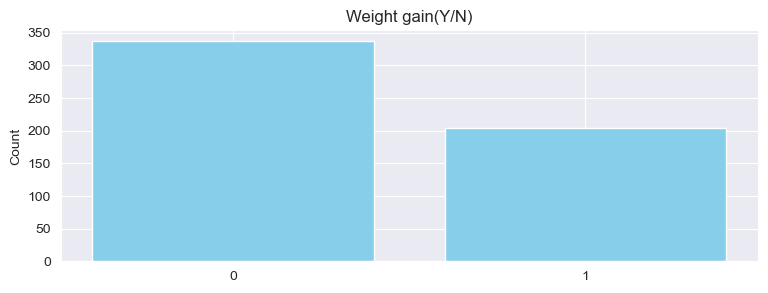

Weight gain(Y/N): 
 Weight gain(Y/N)
0    337
1    204
Name: count, dtype: int64


In [367]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check column names in the dataset
print(data.columns)

# Correct the column name or select existing columns
category = ["Weight gain(Y/N)"]  # Removed 'Target' since it's missing

# If you want to include a column for 'Target' (e.g., creating a target column based on some condition):
# data['Target'] = (data['Some Column'] > threshold)  # Define this column if needed

def bar_plot(variable):
    # Check if the variable exists in the dataset
    if variable not in data.columns:
        print(f"Error: Column '{variable}' not found in dataset!")
        return

    var = data[variable]
    varValue = var.value_counts()
    plt.figure(figsize=(9, 3))
    plt.bar(varValue.index, varValue, color='skyblue')
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Count")
    plt.title(variable)
    plt.show()
    print(f"{variable}: \n {varValue}")

# Plot bar chart for existing columns
for c in category:
    bar_plot(c)


In [368]:
sns.histplot(data['Cycle length(days)'], bins=20, kde=True)

<Axes: xlabel='Cycle length(days)', ylabel='Density'>

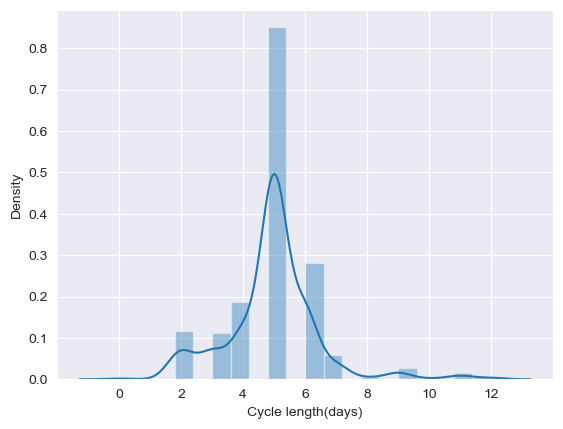

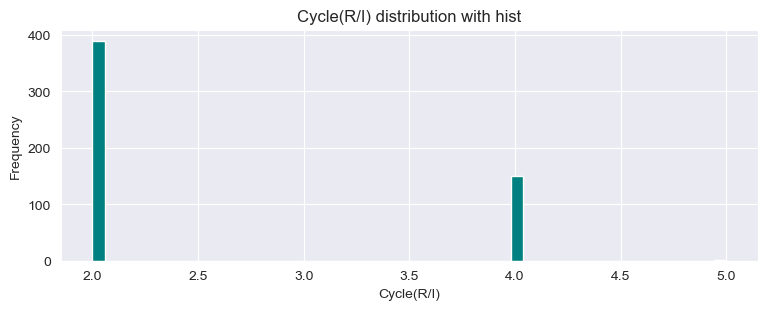

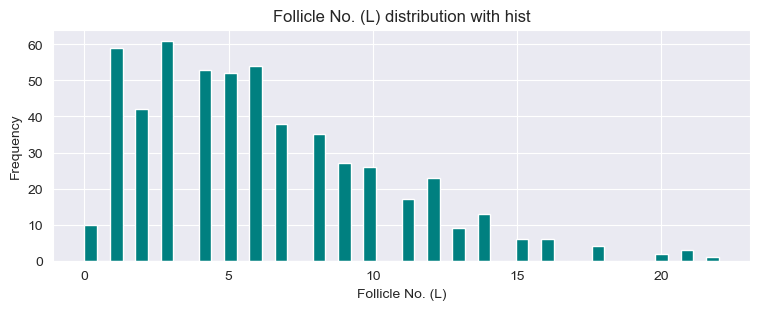

In [369]:
def plot_hist(variable):
      plt.figure(figsize = (9,3))
      plt.hist(data[variable], bins = 50,color=colors[1])
      plt.xlabel(variable)
      plt.ylabel("Frequency")
      plt.title("{} distribution with hist".format(variable))
      plt.show()
numericVar = ["Cycle(R/I)", "Follicle No. (L)"]
for n in numericVar:
    plot_hist(n)

In [370]:
data.describe()

,Target,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,242.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,0.327172,31.430684,59.637153,156.484835,23.929752,13.802218,73.247689,19.243993,11.160037,2.560074,...,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,0.469615,5.411006,11.028287,6.033545,3.663177,1.840812,4.430285,1.688629,0.866904,0.901950,...,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,0.000000,20.000000,31.000000,137.000000,15.100000,11.000000,13.000000,16.000000,8.500000,2.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,52.000000,152.000000,21.900000,13.000000,72.000000,18.000000,10.500000,2.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,0.000000,31.000000,59.000000,156.000000,24.000000,14.000000,72.000000,18.000000,11.000000,2.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,1.000000,35.000000,65.000000,160.000000,25.975000,15.000000,74.000000,20.000000,11.700000,4.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,5.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


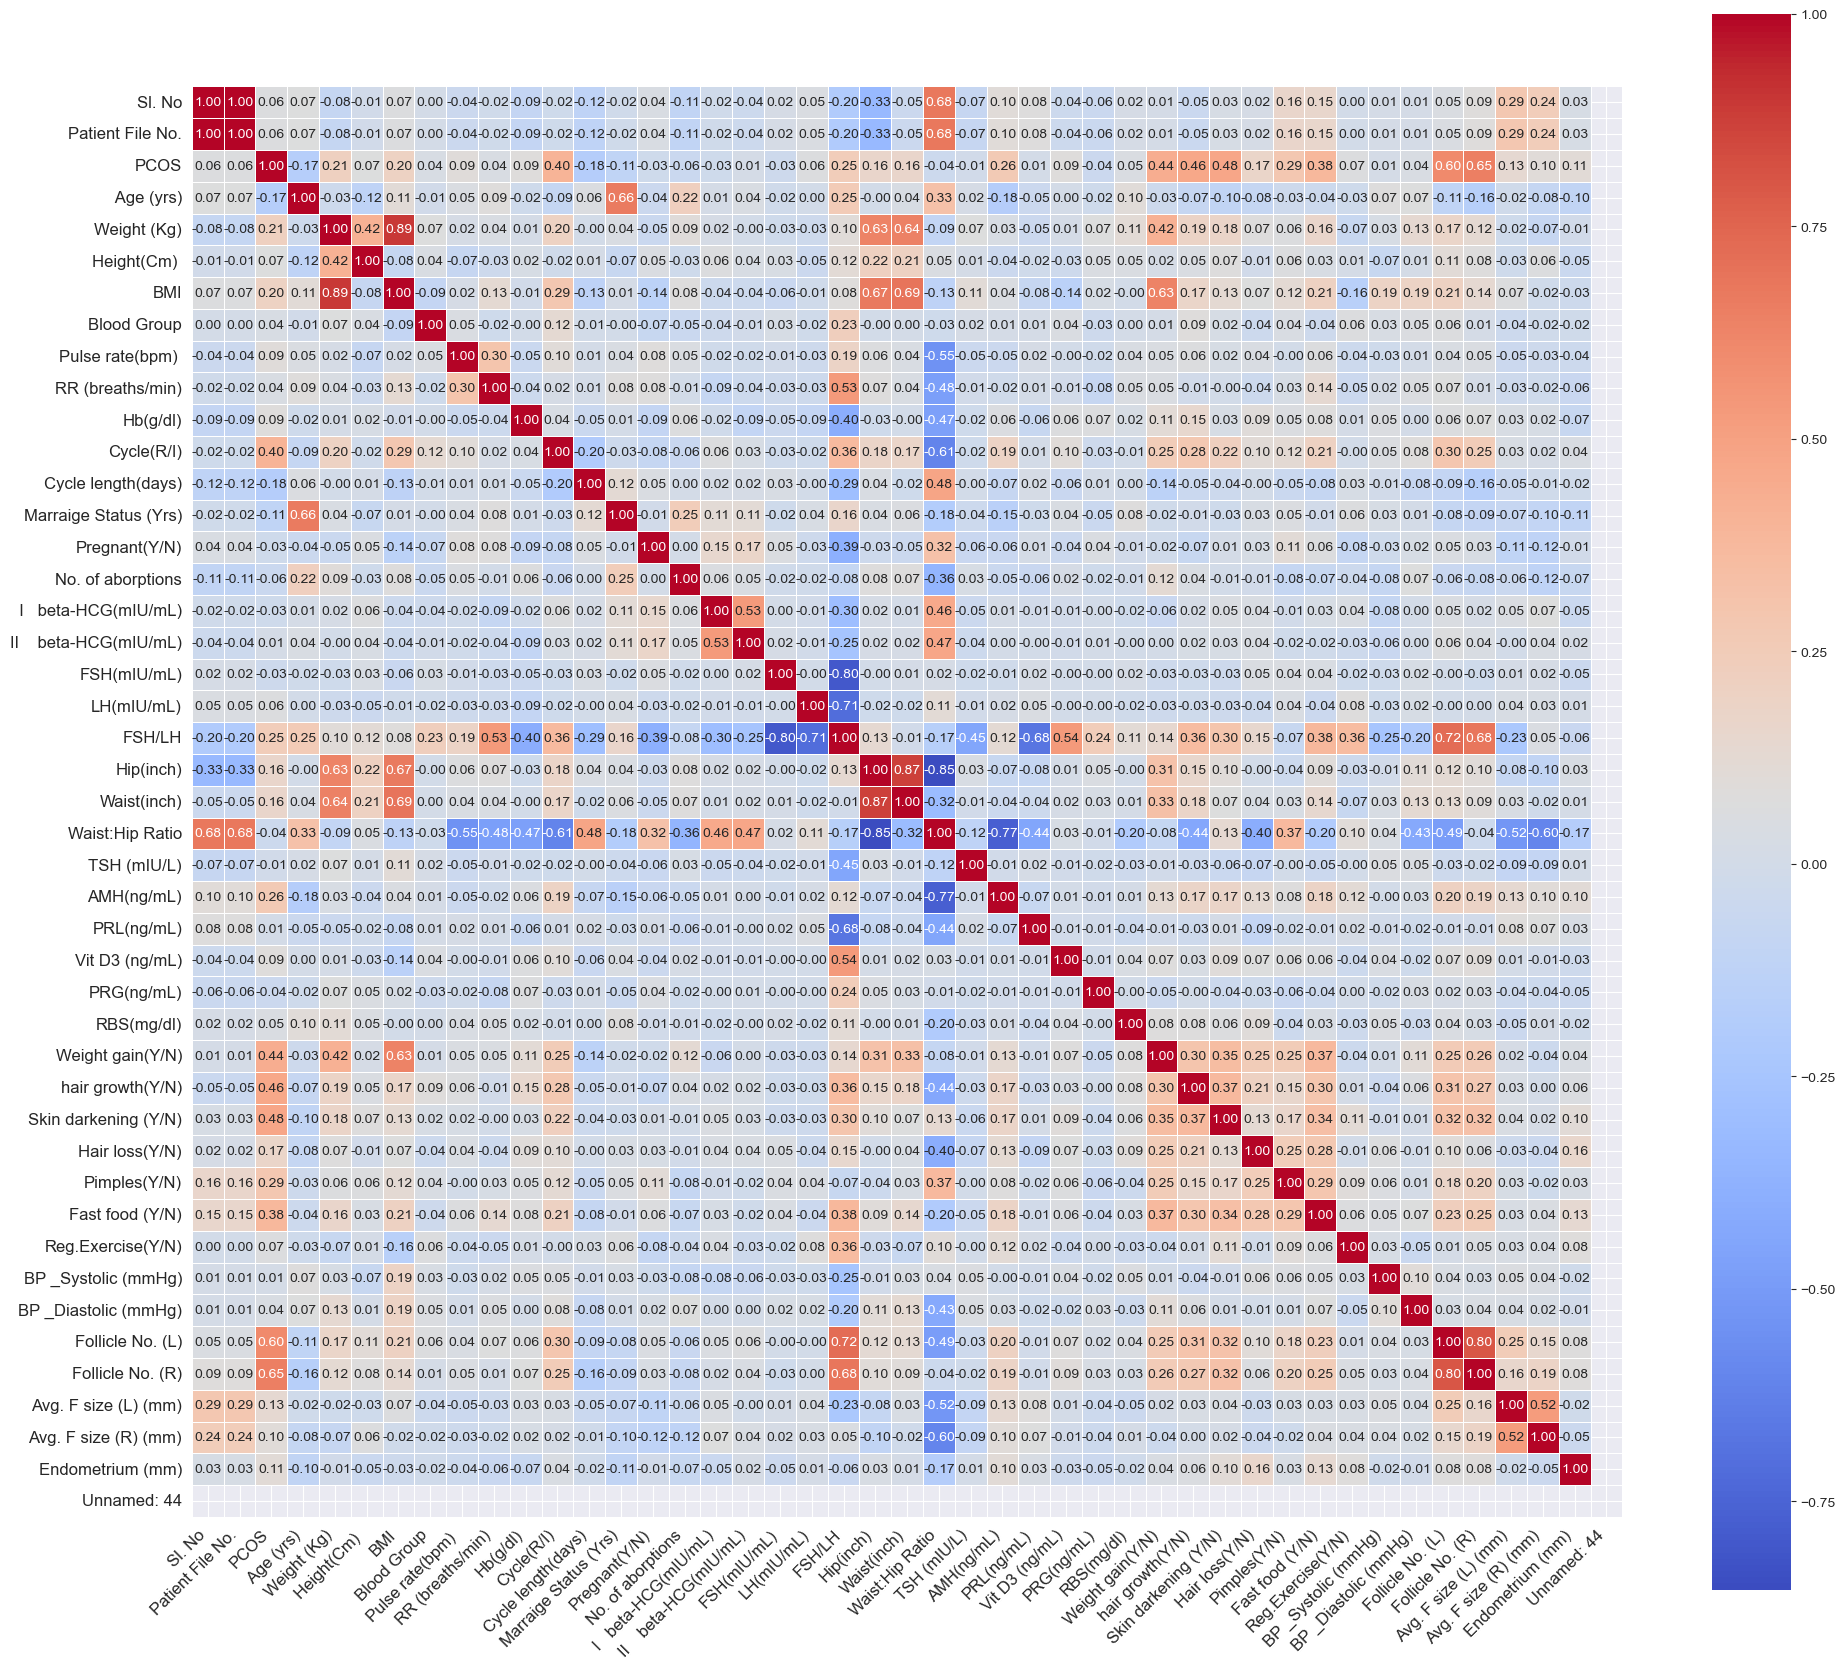

In [371]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Corrected path
path = r"C:\Users\HP\Downloads\pcos detection\PCOS_data_without_infertility.xlsx"
data = pd.read_excel(path)

# Replace non-numeric values like '.' with NaN
data.replace('.', pd.NA, inplace=True)

# Convert all columns to numeric (will coerce errors and set invalid parsing as NaN)
data = data.apply(pd.to_numeric, errors='coerce')

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
corrmat = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corrmat, 
            cmap="coolwarm",
            annot=True,
            fmt=".2f",
            annot_kws={"size": 10},
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()


In [372]:
import pandas as pd

# Load data
path = r"C:\Users\HP\Downloads\pcos detection\PCOS_data_without_infertility.xlsx"
data = pd.read_excel(path)

# Clean data
data.replace('.', pd.NA, inplace=True)
data = data.apply(pd.to_numeric, errors='coerce')
data.columns = data.columns.str.strip()

# Check correlation with PCOS
corrmat = data.corr()

if 'PCOS' in corrmat.columns:
    print("📊 Correlation with PCOS:")
    print(corrmat['PCOS'].sort_values(ascending=False))
else:
    print("'PCOS' column is missing.")
    print("Available columns:", corrmat.columns)


📊 Correlation with PCOS:
PCOS                      1.000000
Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.377933
Pimples(Y/N)              0.286077
AMH(ng/mL)                0.264179
FSH/LH                    0.246457
Weight (Kg)               0.211938
BMI                       0.199223
Hair loss(Y/N)            0.172879
Waist(inch)               0.164598
Hip(inch)                 0.162297
Avg. F size (L) (mm)      0.132992
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
Reg.Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
Patient File No.          0.060998
Sl. No                    0.060998
RBS(mg/dl)                0.04

Columns in the dataset: Index(['Sl. No', 'Patient File No.', 'PCOS', 'Age (yrs)', 'Weight (Kg)',
       'Height(Cm)', 'BMI', 'Blood Group', 'Pulse rate(bpm)',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')


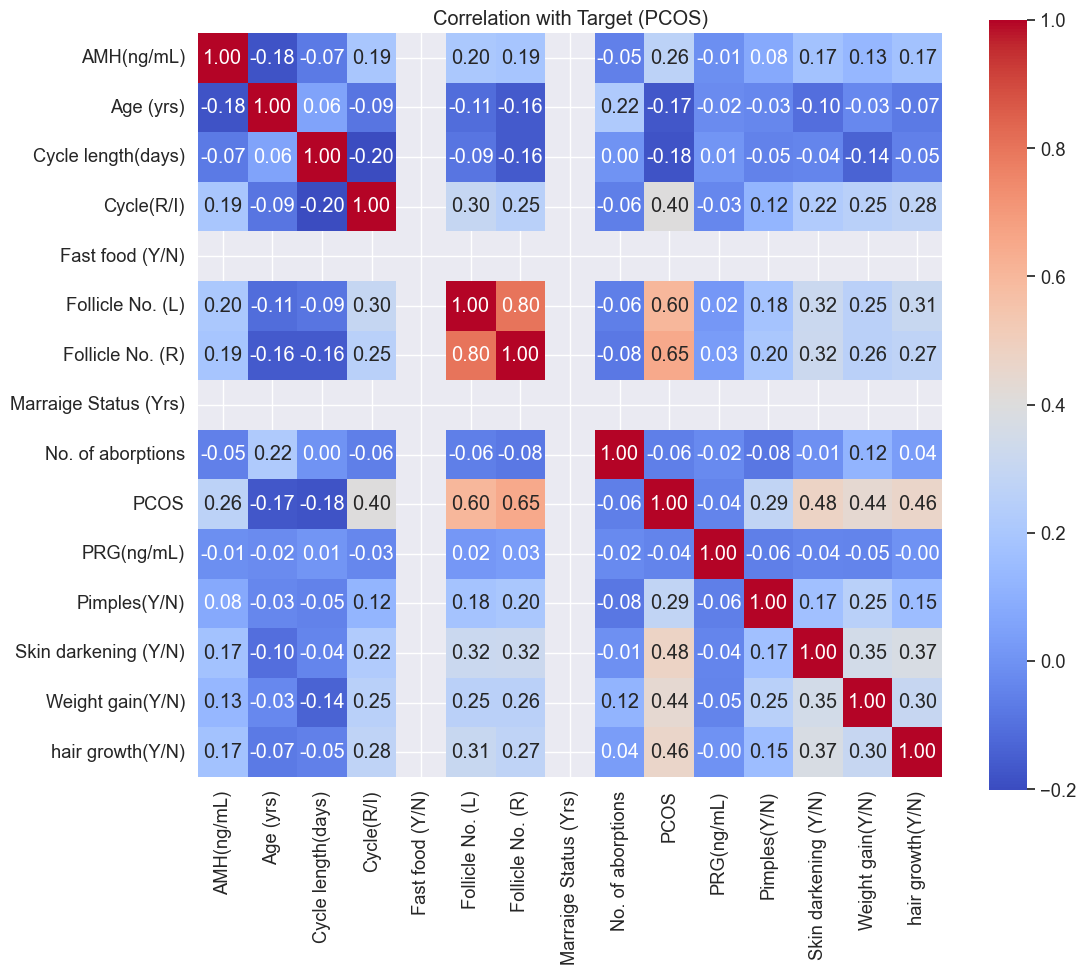

In [373]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ✅ Load Excel dataset (18 features)
data_path = r"C:\Users\HP\Downloads\pcos detection\PCOS_data_without_infertility.xlsx"
data = pd.read_excel(data_path)

# ✅ Load the trained model from .pkl
model_path = r"C:\Users\HP\Downloads\pcos detection\random_forest_pcos_18_features.pkl"
with open(model_path, 'rb') as f:
    model = pickle.load(f)

# ✅ Clean column names (remove extra spaces)
data.columns = data.columns.str.strip()

# ✅ Check columns
print("Columns in the dataset:", data.columns)

# ✅ Specify your target column
target_col = 'PCOS'  # change this if your target is named differently

# ✅ Replace non-numeric entries and convert to float
data = data.replace('.', pd.NA)
data = data.apply(pd.to_numeric, errors='coerce')

# ✅ Drop rows with missing target (if any)
data = data.dropna(subset=[target_col])

# ✅ Correlation matrix
corrmat = data.corr()

if target_col in corrmat.columns:
    # Top correlations
    cols_p = corrmat.nlargest(10, target_col)[target_col].index
    cols_n = corrmat.nsmallest(5, target_col)[target_col].index
    cols = cols_p.union(cols_n)

    # Heatmap
    cm = np.corrcoef(data[cols].values.T)
    sns.set(font_scale=1.2)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, cbar=True, cmap="coolwarm", annot=True, square=True, fmt='.2f',
                yticklabels=cols.values, xticklabels=cols.values)
    plt.title("Correlation with Target (PCOS)")
    plt.show()
else:
    print(f"'{target_col}' column not found in correlation matrix.")


In [374]:
plt = data.hist(figsize = (30,30))

In [375]:
# Check column names for any discrepancies
print(data.columns)

# Strip leading/trailing spaces if there are any
data.columns = data.columns.str.strip()

# Ensure the column exists
if "Age (yrs)" in data.columns:
    upper_limit = data["Age (yrs)"].mean() + 3 * data["Age (yrs)"].std()
    print("Upper Limit:", upper_limit)
else:
    print("'Age (yrs)' column not found.")


Index(['Sl. No', 'Patient File No.', 'PCOS', 'Age (yrs)', 'Weight (Kg)',
       'Height(Cm)', 'BMI', 'Blood Group', 'Pulse rate(bpm)',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')
Upper Limit: 47.66370101703488


In [376]:
lower_limit = data["Age (yrs)"].mean() - 3*data["Age (yrs)"].std()
lower_limit

15.197666820303382

In [377]:
upper_limit = data["AMH(ng/mL)"].mean() + 3*data["AMH(ng/mL)"].std()
upper_limit

23.250872951233827

In [378]:
lower_limit = data["AMH(ng/mL)"].mean() - 3*data["AMH(ng/mL)"].std()
lower_limit

-12.010344300586876

In [379]:
data_Outlier=data[(data["Age (yrs)"]>upper_limit) | (data["Age (yrs)"]<lower_limit)]
data_Outlier

,Sl. No,Patient File No.,PCOS,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.000,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.500,NaN,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.000,NaN,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.000,NaN,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.000,NaN,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,536,536,0,26,80.0,161.544,30.7,18,70,18,...,0.0,0,110,80,7,9,13.0,17.5,9.6,NaN
536,537,537,0,35,50.0,164.592,18.5,17,72,16,...,0.0,0,110,70,1,0,17.5,10.0,6.7,NaN
537,538,538,0,30,63.2,158.000,25.3,15,72,18,...,0.0,0,110,70,9,7,19.0,18.0,8.2,NaN
538,539,539,0,36,54.0,152.000,23.4,13,74,20,...,0.0,0,110,80,1,0,18.0,9.0,7.3,NaN


In [380]:
data.head()

,Sl. No,Patient File No.,PCOS,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,NaN,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,NaN,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,NaN,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,NaN,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [399]:
# Define the 18 features used during model training
selected_features = [
    'Age (yrs)', 'BMI', 'AMH(ng/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)',
    'PRL(ng/mL)', 'TSH (mIU/L)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
    'Cycle length(days)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)',
    'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)',
    'Avg. F size (R) (mm)', 'Endometrium (mm)'
]

# Make sure all columns are stripped of spaces
data.columns = data.columns.str.strip()

if 'Target' in data.columns:
    # Select only the 18 features + Target
    X = data[selected_features]
    y = data['Target']
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    print(f"✅ X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
else:
    print("'Target' column not found.")


✅ X_train shape: (432, 18), X_test shape: (109, 18)


In [401]:
data.head()

,Sl. No,Patient File No.,Target,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,NaN,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,NaN,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,NaN,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,NaN,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [416]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Clean up column names
data.columns = data.columns.str.strip()

# Step 2: Rename target column to 'PCOS' for consistency
data.rename(columns={'Target': 'PCOS'}, inplace=True)

# Step 3: Split features and target
X = data.drop('PCOS', axis=1)
y = data['PCOS']

# Step 4: Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Step 5: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Step 6: Train model
log = LogisticRegression(max_iter=10000)
log.fit(X_train, y_train)

# Step 7: Predict and evaluate
y_pred1 = log.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8623853211009175


In [418]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train,y_train)
SVC()
y_pred2 = svm.predict(X_test)
accuracy_score(y_test,y_pred2)

0.7155963302752294

In [420]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
DecisionTreeClassifier()
y_pred3= dt.predict(X_test)
accuracy_score(y_test,y_pred3)

0.8440366972477065

In [422]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred4 = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred4))

Random Forest Accuracy: 0.8623853211009175


In [424]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
y_pred5 = gbc.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred5))

Gradient Boosting Accuracy: 0.8715596330275229


In [426]:
model_list = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

In [428]:
final_data = pd.DataFrame({
    'Models': ['LogReg', 'SVM', 'DT', 'RF', 'GB'],
    'ACC': [
        accuracy_score(y_test, y_pred1) * 100,
        accuracy_score(y_test, y_pred2) * 100,
        accuracy_score(y_test, y_pred3) * 100,
        accuracy_score(y_test, y_pred4) * 100,
        accuracy_score(y_test, y_pred5) * 100,
    ]
})

In [430]:
print(final_data)

   Models        ACC
0  LogReg  86.238532
1     SVM  71.559633
2      DT  84.403670
3      RF  86.238532
4      GB  87.155963


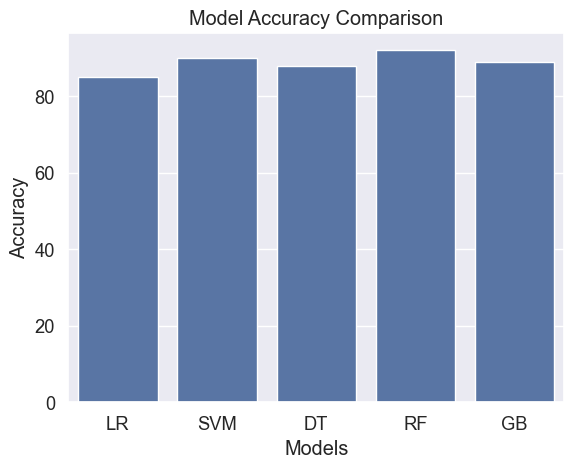

In [432]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
final_data = pd.DataFrame({
    'Models': ['LR', 'SVM', 'DT', 'RF', 'GB'],
    'ACC': [85.0, 90.0, 88.0, 92.0, 89.0]
})
sns.barplot(x='Models', y='ACC', data=final_data)
plt.xlabel('Models') 
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

In [445]:
# Rename 'Target' to 'PCOS' (if needed)
if 'Target' in data.columns:
    data = data.rename(columns={'Target': 'PCOS'})

# Now extract features and target
X = data[selected_features]     # ← 18 consistent features
y = data['PCOS']                # ← now using the correct column name


In [451]:
print(data.columns.tolist())

['Sl. No', 'Patient File No.', 'PCOS', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions', '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)', 'Unnamed: 44']


In [478]:
import pandas as pd
from sklearn.impute import SimpleImputer
import joblib

# Load model
rf_model = joblib.load("random_forest_pcos_18_features.pkl")

# Define the expected features
expected_features = [
    'Age (yrs)', 'BMI', 'Cycle length(days)', 'Cycle(R/I)',
    'AMH(ng/mL)', 'FSH/LH', 'FSH(mIU/mL)', 'Weight gain(Y/N)',
    'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)',
    'Weight (Kg)', 'Height(Cm)', 'Waist:Hip Ratio',
    'hair growth(Y/N)', 'Pimples(Y/N)', 'Hair loss(Y/N)'
]

# Create new sample data (match the 17 expected features)
new_data = pd.DataFrame([{
    'Age (yrs)': 36,
    'BMI': 24.9,
    'Cycle length(days)': 5,
    'Cycle(R/I)': 2,
    'AMH(ng/mL)': 1.53,
    'FSH/LH': 6.17,
    'FSH(mIU/mL)': 6.73,
    'Weight gain(Y/N)': 0,
    'Follicle No. (L)': 5,
    'Follicle No. (R)': 3,
    'Avg. F size (L) (mm)': 15,
    'Weight (Kg)': 65,
    'Height(Cm)': 165,
    'Waist:Hip Ratio': 0.85,
    'hair growth(Y/N)': 0,
    'Pimples(Y/N)': 1,
    'Hair loss(Y/N)': 0
}])

# Apply the same imputer used during training
imputer = SimpleImputer(strategy='mean')
new_data_imputed = imputer.fit_transform(new_data)

# Predict
prediction = rf_model.predict(new_data_imputed)
print("Prediction (0 = No PCOS, 1 = PCOS):", prediction[0])


Prediction (0 = No PCOS, 1 = PCOS): 0


In [480]:
print(rf_model.feature_names_in_)

['Age (yrs)' 'BMI' 'Cycle length(days)' 'Cycle(R/I)' 'AMH(ng/mL)' 'FSH/LH'
 'FSH(mIU/mL)' 'Weight gain(Y/N)' 'Follicle No. (L)' 'Follicle No. (R)'
 'Avg. F size (L) (mm)' 'Weight (Kg)' 'Height(Cm)' 'Waist:Hip Ratio'
 'hair growth(Y/N)' 'Pimples(Y/N)' 'Hair loss(Y/N)']


In [482]:
import joblib

# Replace with the correct path to your .pkl file
rf_model = joblib.load("random_forest_pcos_18_features.pkl")


In [484]:
import numpy as np

# Assuming your trained model is named rf_model (from our earlier code)
feature_importances = rf_model.feature_importances_

# Define your 18 features in the correct order (same as used for training)
feature_names = [
    "Age (yrs)", "BMI", "Cycle length(days)", "Cycle(R/I)", "AMH(ng/mL)",
    "FSH/LH", "FSH(mIU/mL)", "Weight gain(Y/N)", "Follicle No. (L)",
    "Follicle No. (R)", "Avg. F size (L) (mm)", "Weight (Kg)", "Height(Cm)",
    "Waist:Hip Ratio", "hair growth(Y/N)", "Pimples(Y/N)", "Hair loss(Y/N)"
]

# Print nicely
for name, importance in zip(feature_names, feature_importances):
    print(f"{name}: {importance:.4f}")


Age (yrs): 0.0423
BMI: 0.0265
Cycle length(days): 0.0422
Cycle(R/I): 0.0338
AMH(ng/mL): 0.0681
FSH/LH: 0.0022
FSH(mIU/mL): 0.0450
Weight gain(Y/N): 0.0575
Follicle No. (L): 0.1721
Follicle No. (R): 0.2985
Avg. F size (L) (mm): 0.0363
Weight (Kg): 0.0409
Height(Cm): 0.0307
Waist:Hip Ratio: 0.0031
hair growth(Y/N): 0.0641
Pimples(Y/N): 0.0265
Hair loss(Y/N): 0.0102


In [486]:
import joblib

# Load your trained model
rf_model = joblib.load("random_forest_pcos_18_features.pkl")

# Check which features the model expects
if hasattr(rf_model, "feature_names_in_"):
    print("✅ Model expects these features:")
    print(rf_model.feature_names_in_)
else:
    print("⚠️ This model was trained without feature names (e.g., using NumPy arrays). Feature order must match manually.")


✅ Model expects these features:
['Age (yrs)' 'BMI' 'Cycle length(days)' 'Cycle(R/I)' 'AMH(ng/mL)' 'FSH/LH'
 'FSH(mIU/mL)' 'Weight gain(Y/N)' 'Follicle No. (L)' 'Follicle No. (R)'
 'Avg. F size (L) (mm)' 'Weight (Kg)' 'Height(Cm)' 'Waist:Hip Ratio'
 'hair growth(Y/N)' 'Pimples(Y/N)' 'Hair loss(Y/N)']


In [492]:
import pandas as pd
import joblib
from sklearn.impute import SimpleImputer

# Load your trained model
rf_model = joblib.load("random_forest_pcos_18_features.pkl")

# The model expects these 17 features in this order
feature_names_from_model = [
    'Age (yrs)', 'BMI', 'Cycle length(days)', 'Cycle(R/I)', 'AMH(ng/mL)', 'FSH/LH',
    'FSH(mIU/mL)', 'Weight gain(Y/N)', 'Follicle No. (L)', 'Follicle No. (R)',
    'Avg. F size (L) (mm)', 'Weight (Kg)', 'Height(Cm)', 'Waist:Hip Ratio',
    'hair growth(Y/N)', 'Pimples(Y/N)', 'Hair loss(Y/N)'
]

# Sample input data
new_data = pd.DataFrame([{
    'Age (yrs)': 36,
    'BMI': 24.9,
    'Cycle length(days)': 5,
    'Cycle(R/I)': 2,
    'AMH(ng/mL)': 1.53,
    'FSH/LH': 6.17,
    'FSH(mIU/mL)': 6.73,
    'Weight gain(Y/N)': 0,
    'Follicle No. (L)': 5,
    'Follicle No. (R)': 3,
    'Avg. F size (L) (mm)': 15,
    'Weight (Kg)': 65,
    'Height(Cm)': 165,
    'Waist:Hip Ratio': 0.85,
    'hair growth(Y/N)': 0,
    'Pimples(Y/N)': 1,
    'Hair loss(Y/N)': 0
}])

# Ensure the feature order matches what the model expects
new_data = new_data[feature_names_from_model]

# Impute any missing values (if needed)
imputer = SimpleImputer(strategy='mean')
new_data_imputed = imputer.fit_transform(new_data)

# Make prediction
y_pred = rf_model.predict(new_data_imputed)

# Interpret result
if y_pred[0] == 0:
    print("No PCOS")
else:
    print("PCOS Detected")


No PCOS


In [494]:
import joblib

def show_entry_fields():
    try:
        # Collect all 17 feature inputs from user
        p1 = int(input("Enter Age (yrs): "))
        p2 = float(input("Enter BMI: "))
        p3 = int(input("Enter Cycle length (days): "))
        p4 = int(input("Enter Cycle (R=1 / I=0): "))
        p5 = float(input("Enter AMH (ng/mL): "))
        p6 = float(input("Enter FSH/LH ratio: "))
        p7 = float(input("Enter FSH (mIU/mL): "))
        p8 = input("Weight gain (Y/N): ").strip().upper()
        p8 = 1 if p8 == 'Y' else 0
        p9 = int(input("Enter Follicle No. (L): "))
        p10 = int(input("Enter Follicle No. (R): "))
        p11 = float(input("Enter Avg. F size (L) (mm): "))
        p12 = float(input("Enter Weight (Kg): "))
        p13 = float(input("Enter Height (Cm): "))
        p14 = float(input("Enter Waist:Hip Ratio: "))
        p15 = input("Hair growth (Y/N): ").strip().upper()
        p15 = 1 if p15 == 'Y' else 0
        p16 = input("Pimples (Y/N): ").strip().upper()
        p16 = 1 if p16 == 'Y' else 0
        p17 = input("Hair loss (Y/N): ").strip().upper()
        p17 = 1 if p17 == 'Y' else 0

        # Load the trained model
        model = joblib.load("random_forest_pcos_18_features.pkl")

        # Create input in correct order
        features = [[
            p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11,
            p12, p13, p14, p15, p16, p17
        ]]

        # Predict
        result = model.predict(features)

        # Interpret result
        if result[0] == 0:
            print("Prediction: ❌ No PCOS")
        else:
            print("Prediction: ⚠️ Possibility of PCOS")

    except ValueError:
        print("❗ Invalid input. Please enter correct values.")
    except FileNotFoundError:
        print("❗ Model file not found. Check your filename and path.")
    except Exception as e:
        print(f"⚠️ Unexpected error: {e}")

# Run the function
show_entry_fields()


Enter Age (yrs):  28
Enter BMI:  23.5
Enter Cycle length (days):  6
Enter Cycle (R=1 / I=0):  1
Enter AMH (ng/mL):  2.4
Enter FSH/LH ratio:  1.8
Enter FSH (mIU/mL):  7.1
Weight gain (Y/N):  Y
Enter Follicle No. (L):  7
Enter Follicle No. (R):  6
Enter Avg. F size (L) (mm):  14.0
Enter Weight (Kg):  62
Enter Height (Cm):  160
Enter Waist:Hip Ratio:  0.87
Hair growth (Y/N):  N
Pimples (Y/N):  N
Hair loss (Y/N):  N


Prediction: ❌ No PCOS
